In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
value=pd.read_csv("https://raw.githubusercontent.com/insaid2018/pca-file/master/train.csv")
value.head()
#dataset having target variable as the amount of money transacted and about 4900 features 

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
value.shape

(4459, 4993)

In [4]:
value.columns

Index(['ID', 'target', '48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00',
       '2f0771a37', '30347e683', 'd08d1fbe3', '6ee66e115',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4993)

In [5]:
value.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [6]:
value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [7]:
value.select_dtypes(include=['object']).dtypes #checking which feature is object data type

ID    object
dtype: object

In [8]:
value.isnull().sum().any()

False

In [9]:
value=value.drop('ID',axis=1)

In [10]:
value['target'].describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

C:\Users\prish\AppData\Local\Temp\ipykernel_24884\1017415132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value['target'])
C:\Users\prish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Density'>

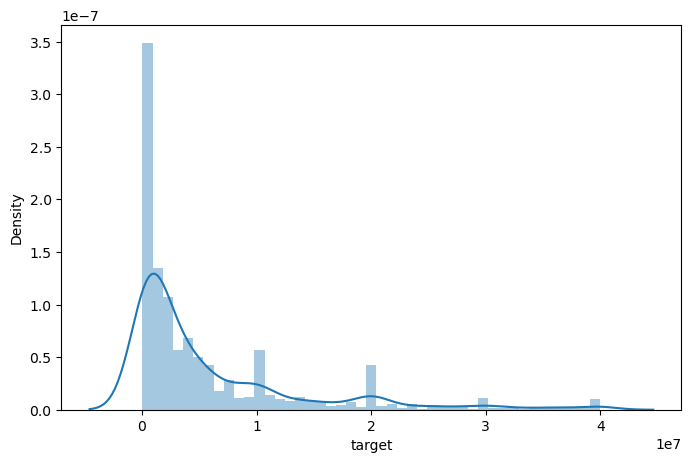

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(value['target'])

C:\Users\prish\AppData\Local\Temp\ipykernel_24884\2705360102.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(value['target']),kde='false')
C:\Users\prish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Density'>

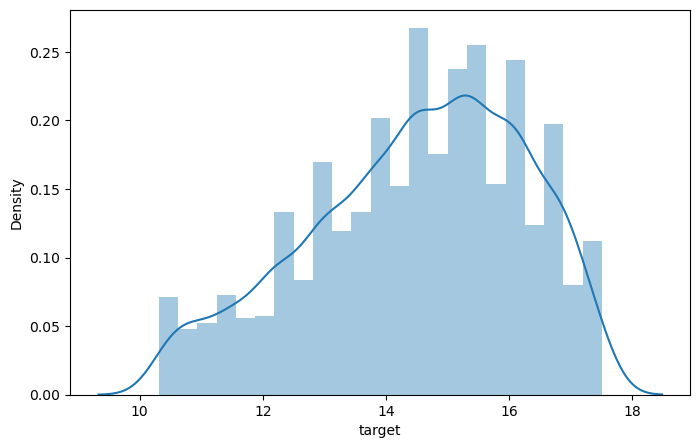

In [12]:
#here, we can see that it is right skewed data,so we will use log transformation
plt.figure(figsize=(8,5))
sns.distplot(np.log1p(value['target']),kde='false')


In [13]:
#now it is much closer to a normal distribution
np.log1p(value['target']).describe()

count    4459.000000
mean       14.490239
std         1.750947
min        10.308986
25%        13.304687
50%        14.630876
75%        15.894952
max        17.504390
Name: target, dtype: float64

In [14]:
#after using log transformation, we can see that the mean and median are almost similar-this is good for us as dealing with standardised data is better
value['target'].sort_values(ascending=False)

3835    40000000.0
4220    40000000.0
3668    40000000.0
2266    40000000.0
4111    40000000.0
           ...    
3698       30000.0
2583       30000.0
386        30000.0
2546       30000.0
2974       30000.0
Name: target, Length: 4459, dtype: float64

the target ranges from 10^4 -10^7

In [15]:
Counter(value['target']).most_common()[:5] #getting top 5 most common values

[(2000000.0, 207),
 (10000000.0, 199),
 (20000000.0, 156),
 (4000000.0, 148),
 (1000000.0, 129)]

<Axes: >

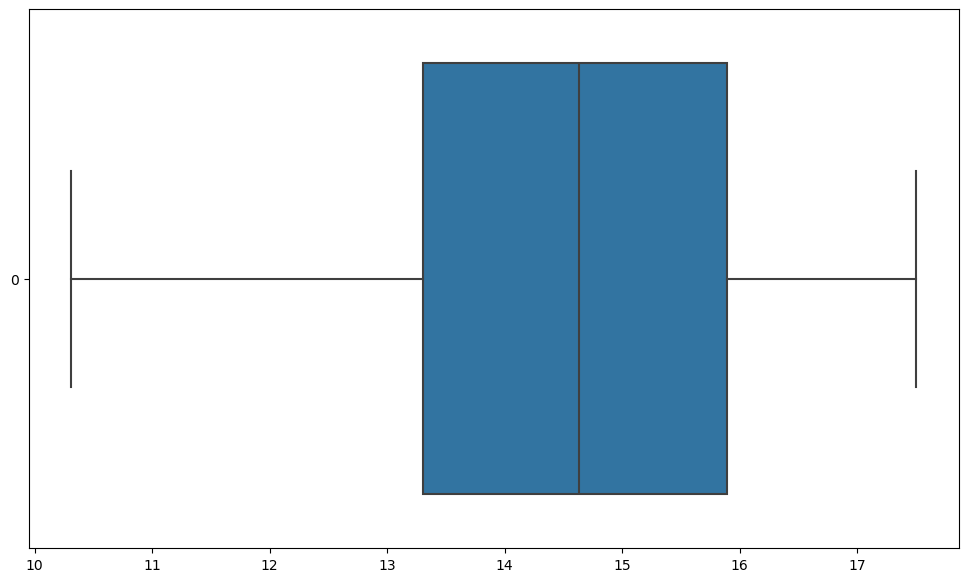

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(np.log1p(value['target']), orient='h')

In [17]:
#we can see no outliers

In [18]:
#now we drop all those columns having std dev = 0 as such columns do not help us in prediction
drop_cols=[]
for cols in value.columns:
    if value[cols].std() == 0:
      drop_cols.append(cols)
print("no. of columns dropped: ",len(drop_cols))
print(drop_cols)
value.drop(drop_cols,axis=1,inplace=True)

no. of columns dropped:  256
['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a7421

In [19]:
#Now we standardise the remaining data
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc.fit(value)
value_sc=sc.transform(value)

In [20]:
print(value_sc)

[[ 3.89330325 -0.03764565 -0.02163947 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.64917665 -0.03764565 -0.02163947 ... -0.07234203 -0.05636327
  -0.12585201]
 [ 0.49251616 -0.03764565 -0.02163947 ... -0.07234203 -0.05636327
  -0.12585201]
 ...
 [-0.38197195 -0.03764565 -0.02163947 ... -0.07234203 -0.05636327
  -0.12585201]
 [ 0.49251616 -0.03764565 -0.02163947 ... -0.07234203 -0.05636327
  -0.12585201]
 [ 1.70708298 -0.03764565 -0.02163947 ... -0.07234203 -0.05636327
  -0.12585201]]


In [21]:
#now that the features are standardised , we assign them in object x
X =value.loc[:,value.columns !='target']
X.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [22]:
y =np.log1p(value['target'])   #to get standard values of target and assign it to object y
y.head()

0    17.453097
1    13.304687
2    16.118096
3    14.508658
4    16.482739
Name: target, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
print(X_train.shape) #since we had dropped a few cols, now we deal with about 4700 features
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3567, 4735)
(3567,)
(892, 4735)
(892,)


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
%%time
rfc=RandomForestRegressor(random_state=0)
rfc.fit(X_train,y_train) #we make the model and fit the training set

CPU times: total: 3min 12s
Wall time: 3min 24s


RandomForestRegressor(random_state=0)

In [28]:
predictions=rfc.predict(X_test)  #now we use the model to predict on the test set

In [29]:
print(predictions)

[14.6628646  14.68219687 12.03681117 14.84892003 13.53126709 14.65850909
 15.33596762 16.05648144 13.98085438 15.00951275 15.730343   15.77623961
 14.51777257 14.60874079 15.46340797 13.83762493 14.88000452 14.79812397
 15.40507872 15.11148442 14.01518779 15.30379476 14.38778811 14.86078904
 12.52019587 14.36902409 14.73425033 13.30377023 14.84002333 13.52269918
 14.64358765 15.71852019 14.23975486 13.39665372 14.34711755 14.03241543
 16.02226127 14.28117964 14.87984162 12.70521863 14.24058875 14.34671233
 14.91098917 14.3952385  14.57462148 14.31676836 14.52301041 11.58670129
 13.72870149 15.55047549 15.08257273 14.19551384 14.38017206 14.13382577
 14.28872359 16.5105053  14.34033977 12.72367938 13.22994583 15.26708416
 14.62461001 13.92854063 14.88633243 14.41427082 13.12347361 14.64585033
 12.64360089 13.09498176 14.63019563 14.96723162 14.99156793 12.45147112
 13.01457188 15.00728329 15.01365677 14.87071705 17.34447087 14.07557261
 14.8815424  17.27417071 13.91064208 13.44905089 14

In [30]:
from sklearn import metrics
RMSE_test =np.sqrt(metrics.mean_squared_error(y_test,predictions))
print('RMSE for a test set is : ',RMSE_test)

RMSE for a test set is :  1.3964397018563495


#Now we shall use PCA to try and get predictions in lesser time

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(0.95 , random_state =0).fit(X) #here , we are specifying 95 percent of the variance to be explained by the PC's

In [33]:
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100) #we plot the explained variance of our PCA model

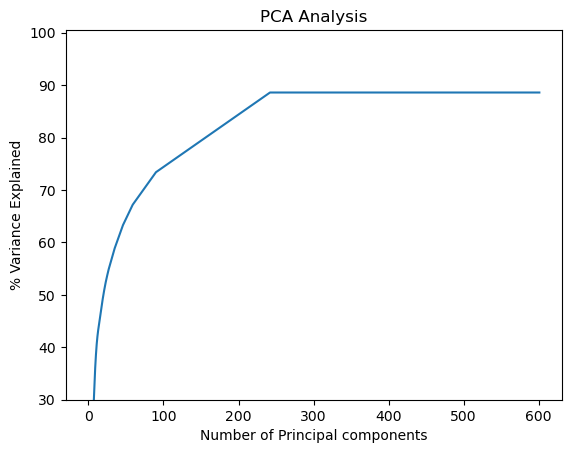

In [34]:
plt.plot(var)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Principal components')
plt.title('PCA Analysis')
plt.ylim(30, 100.5)
plt.style.context('seaborn-whitegrid')

In [35]:
#so, 95% variance is explained by the first 600 principle components
print('%d components explain 95%% of the variation in data' % pca.n_components_)


602 components explain 95% of the variation in data


In [36]:
#now we build a new pca model that takes in the first 602 PC's as features to predict
#so from the earlier 4900 , we used 4700(removing one's with no std dev) and then now we use 602 pc's finally while applying pca
pca = PCA(n_components=602,random_state=0)
pca.fit(X)
X =pca.transform(X)
print(X.shape)

(4459, 602)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
print(X_train.shape)
print(X_test.shape)

(3567, 602)
(892, 602)


In [39]:
%%time 
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

CPU times: total: 3min 18s
Wall time: 3min 26s


RandomForestRegressor(random_state=0)

In [40]:
predictions_pca=rf.predict(X_test)

In [41]:
predictions_pca

array([14.86963647, 14.51505519, 13.83045677, 14.77021866, 14.38956602,
       13.40341761, 14.52276121, 15.4161659 , 14.05351193, 15.12063969,
       15.08666533, 14.80293692, 14.42380603, 14.73019688, 14.78730785,
       14.43577883, 14.87927389, 15.16019776, 14.15788266, 15.18251055,
       14.92111156, 14.90405959, 14.22011926, 13.69965503, 14.04561694,
       15.99050901, 14.59622575, 12.80718464, 14.68392128, 14.16228594,
       13.81556655, 14.4496948 , 14.26954921, 13.26719684, 14.05469218,
       14.05318882, 15.33414659, 14.4912507 , 14.73439255, 12.82653326,
       14.88127128, 15.90828824, 15.11618977, 13.8533085 , 13.9644249 ,
       14.49007436, 15.11602851, 14.43523365, 14.03053623, 14.94549049,
       15.22212004, 13.44936504, 14.5709322 , 14.70100069, 12.80730984,
       15.40825036, 14.92136435, 12.68301164, 14.4371284 , 14.70254534,
       14.61908455, 13.14967542, 14.58799125, 12.99673592, 14.53822541,
       14.39014196, 13.43902898, 13.39790346, 14.82553683, 14.55

In [42]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 1.5120635539597702


In [43]:
#We had observed that beyond 300 features the percentage captured variance remains constant, so we use only the first 300 components
pca_2 = PCA(n_components=300,random_state=0)
pca_2.fit(X)
X =pca_2.transform(X)
print(X.shape)

(4459, 300)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
print(X_train.shape)
print(X_test.shape)

(3567, 300)
(892, 300)


In [46]:
%%time                    
rf_2 = RandomForestRegressor(random_state=0)
rf_2.fit(X_train, y_train)

CPU times: total: 1min 42s
Wall time: 1min 48s


RandomForestRegressor(random_state=0)

#so, a much better model as it takes 1 min (compared with 3 min it took before )

In [47]:
predictions_pca_2 = rf_2.predict(X_test)

In [48]:
predictions_pca_2

array([14.77164528, 14.58104542, 14.64958131, 14.84197412, 14.04355648,
       13.27270865, 14.31125946, 15.29952613, 14.08143477, 15.12265225,
       14.96394071, 14.88066273, 14.89775739, 15.04443023, 14.88115206,
       14.73824718, 15.04405713, 15.21337281, 14.50280496, 15.18067541,
       14.71654973, 14.95448503, 14.1260814 , 13.78298076, 13.55211444,
       16.04506324, 14.72515113, 12.63624726, 14.72117872, 13.91263765,
       13.68397325, 14.78809258, 14.23078809, 13.78579631, 14.12096855,
       14.01995339, 15.20915596, 14.64001706, 14.9443096 , 13.25464292,
       14.69561577, 15.38015865, 14.76364521, 13.64349663, 13.81573402,
       14.6065007 , 15.21211408, 13.95033467, 14.0456109 , 14.97901612,
       15.14409129, 13.14763016, 14.40575725, 14.74267616, 13.30482649,
       15.19188243, 14.76359102, 12.69136552, 14.38753913, 14.68775337,
       14.37919741, 13.40424547, 14.51469909, 13.80347633, 14.33266955,
       14.55523052, 12.98072162, 13.48416214, 14.66353416, 14.72

In [49]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca_2))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 1.495356704539613


Thus after using 300 PC's we have RMSE =1.49 [RMSE WITH 602 PC's was 1.51 and without PCA was 1.39]
Training time for :
*300 PC's-1.42 min
*602 PC's-3.18 min  #Here, after PCA the model might have grown out deeper trees, which is why it takes longer than without PCA
*before PCA-3.12 min

Thus, here we are at an accuracy-time trade-off , you need to decide what is more important for you. 

#We can now use exponents to get back the same order of target variables as before(when we had not used log transform)

In [50]:
predictions_pca_exp = np.expm1(predictions_pca_2)

In [51]:
print(len(predictions_pca_exp))

892


In [52]:
print(predictions_pca_exp[:20])

[2601620.02007608 2150143.10439058 2302672.31008655 2791176.53881523
 1256142.00654434  581116.72981029 1641726.27206678 4410620.33974141
 1304635.17380901 3695594.4591764  3153237.91667764 2901279.44938343
 2951302.20328679 3417534.48428829 2902699.48122681 2516165.78313259
 3416259.62192301 4046539.21803963 1988327.63398634 3916367.61320967]
